## Matplotlib Homework - The Power of Plots

In [44]:
# Load Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from tabulate import tabulate


# path to CSV data
mouse_csv = "data/Mouse_metadata.csv"
study_csv = "data/Study_results.csv"

# Read the CSV data
mouse_df = pd.read_csv(mouse_csv)
study_df = pd.read_csv(study_csv)

# combine the two dataset mouse and study
# combined_df = pd.merge(study_df, mouse_df, how="inner", on=["Mouse ID", "Mouse ID"])



In [45]:
# Merge our two data frames together
combined_data = pd.merge(mouse_df, study_df, on="Mouse ID")
# Review the information on the newly created merged dataframe
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [46]:
#Cleaned data - Replace spaces in column names with under_score
combined_df.columns = combined_df.columns.str.replace(' ', '_')
combined_df.head().style.set_table_styles([{'selector':'','props':[('border','4px solid #7a7')]}])

,Mouse_ID,Timepoint,Tumor_Volume_(mm3),Metastatic_Sites,Drug_Regimen,Sex,Age_months,Weight_(g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


## Summary statistics table 
### With "mean", "median", "variance", "standard deviation", and "SEM" of the tumor volume for each regim

In [47]:
summary_regimen = combined_df.groupby('Drug_Regimen')

regimen_df = pd.DataFrame({
            'Total Trials': summary_regimen['Mouse_ID'].count(),
            'Mean': summary_regimen['Tumor_Volume_(mm3)'].mean(),
            'Median': summary_regimen['Tumor_Volume_(mm3)'].median(),
            'Variance': summary_regimen['Tumor_Volume_(mm3)'].var(),
            'Standard_Dev': summary_regimen['Tumor_Volume_(mm3)'].std(),
            'SEM': summary_regimen['Tumor_Volume_(mm3)'].sem()
            })

regimen_df.style.set_table_styles([{'selector':'','props':[('border','4px solid #7a7')]}])

,Total Trials,Mean,Median,Variance,Standard_Dev,SEM
Drug_Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,161,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots 
#### Using Pandas's DataFrame.plot() and Matplotlib's pyplot that shows the number of data points for each treatment regimen.

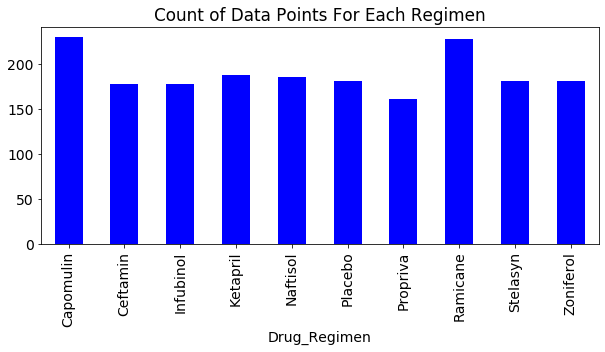

In [94]:
data_point_regimen = pd.DataFrame({
            'Count Drug Regimen': summary_regimen['Mouse_ID'].count()
            })


data_point_regimen.plot(kind='bar', 
                    title='Count of Data Points For Each Regimen',
                    legend=False,
                    color='blue',
                    figsize = (10,4)
                      )
plt.savefig("images/barchart1.PNG")
plt.show()

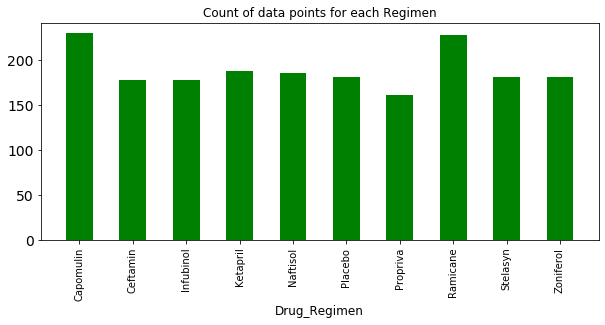

In [95]:
# bar plot showing number of data points for each regiment
counts = summary_regimen['Mouse_ID'].count()
x_axis = np.arange(len(counts))
count_ticks = [value for value in x_axis]

fig = plt.figure(figsize = (10,4))
plt.title("Count of data points for each Regimen", fontsize=12)
plt.xlabel("Drug_Regimen", fontsize=12)

plt.bar(x_axis,counts, width = .5, color='green')
plt.xticks(count_ticks, counts.index.values, fontsize=10, rotation=90,)
plt.savefig("images/barchart2.PNG")
plt.show()

## Pie plots
### Shows the distribution of female or male mice in the study.

In [50]:
# DF grouping by "Sex" 
gender = combined_df.groupby('Sex')
gender_count = pd.DataFrame(gender['Sex'].count())
gender_count.head()

,Sex
Sex,
Female,935
Male,958


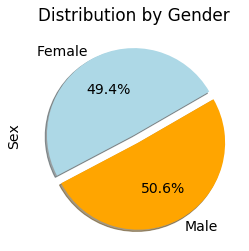

In [96]:
gender_count.plot(kind='pie', y='Sex', \
                  title="Distribution by Gender", startangle=30, \
                 autopct='%1.1f%%', explode=[0, 0.1], shadow=True, fontsize=14, colors =["lightblue","orange"],legend =False)

plt.savefig("images/pie1.PNG")

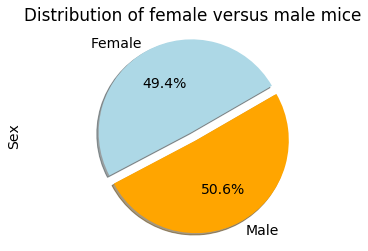

<Figure size 432x288 with 0 Axes>

In [97]:
genders = list(gender_count.index.values)
genders_count = gender_count['Sex']

plt.pie(genders_count, labels=genders, 
        autopct="%1.1f%%", explode=[0, 0.1], shadow=True, startangle=30, colors =["lightblue","orange"],)
plt.rcParams['font.size'] = 14
plt.title("Distribution of female versus male mice")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()
plt.savefig("images/pie2.PNG")

In [80]:
# Calculate final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

#DF with the most promising treatment
top_four_treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
top_four_df = combined_df[combined_df["Drug_Regimen"].isin(top_four_treatment)]

#Clean DF with only columns wanted for analysis
top_four_clean_df = top_four_df[["Drug_Regimen", "Mouse_ID", "Timepoint", "Tumor_Volume_(mm3)"]]
top_four_clean_df.head().style.set_table_styles([{'selector':'','props':[('border','4px solid #7a7')]}])

,Drug_Regimen,Mouse_ID,Timepoint,Tumor_Volume_(mm3)
0,Capomulin,b128,0,45.000000
1,Capomulin,b128,5,45.651331
2,Capomulin,b128,10,43.270852
3,Capomulin,b128,15,43.784893
4,Capomulin,b128,20,42.731552


In [82]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.

# Sorted DF in descending order by Timepoint
top_four_sorted = top_four_clean_df.sort_values("Timepoint", ascending=False)

# Clean value and keep the first listed Mouse_ID in Dataframe.
top_four_result = top_four_sorted.drop_duplicates(subset ="Mouse_ID", keep='first' )

#list summary table
top_four_result.head().style.set_table_styles([{'selector':'','props':[('border','4px solid #7a7')]}])   

,Drug_Regimen,Mouse_ID,Timepoint,Tumor_Volume_(mm3)
1892,Capomulin,m601,45,28.430964
1700,Capomulin,s185,45,23.343598
1364,Ceftamin,y865,45,64.729837
1497,Ceftamin,x581,45,64.634949
1844,Capomulin,l897,45,38.846876


In [83]:
# Calcaulate the quartiles and IQR and quantitatively determine if there are any potential outliers. 
treatment_results = top_four_result['Tumor_Volume_(mm3)']

quartiles = treatment_results.quantile([.25,.5,.75])
lower = quartiles[0.25].round(2)
upper = quartiles[0.75].round(2)
interq = round(upper-lower,2)

print(f"----------------------------------------------------------")
print(f"The lower quartile is: {lower}")
print(f"The upper quartile is: {upper}")
print(f"The interquartile range of the final results is: {interq}")

lower_range = round(lower - (1.5*interq),2)
upper_bound = round(upper + (1.5*interq),2)

lower_outliers = treatment_results[treatment_results < lower_range].count().round(2)
upper_outliers = treatment_results[treatment_results > upper_bound].count().round(2)
total_outliers = lower_outliers + upper_outliers
print(f"----------------------------------------------------------")
print(f"There are {lower_range} lower limit.")
print(f"There are {upper_bound} upper limit.")
print(f"There are {total_outliers} outliers in the dataset.")
print(f"----------------------------------------------------------")
print()

----------------------------------------------------------
The lower quartile is: 37.19
The upper quartile is: 59.93
The interquartile range of the final results is: 22.74
----------------------------------------------------------
There are 3.08 lower limit.
There are 94.04 upper limit.
There are 0 outliers in the dataset.
----------------------------------------------------------



In [84]:
#Create dataframe of each Drug Regimen for anlaysis
Infubinol_df = top_four_result.loc[top_four_result["Drug_Regimen"] == "Infubinol"]["Tumor_Volume_(mm3)"]
capomulin_df = top_four_result.loc[top_four_result["Drug_Regimen"] == "Capomulin"]["Tumor_Volume_(mm3)"]
ramicane_df = top_four_result.loc[top_four_result["Drug_Regimen"] == "Ramicane"]["Tumor_Volume_(mm3)"]
ceftamin_df = top_four_result.loc[top_four_result["Drug_Regimen"] == "Ceftamin"]["Tumor_Volume_(mm3)"]

In [57]:

# Calcualed quartitile and IQR and quantitatively determine if there are any potential outliers across all . 
quartiles_inf = Infubinol_df.quantile([.25,.5,.75])
lowerq_inf = quartiles_inf[0.25].round(2)
upperq_inf = quartiles_inf[0.75].round(2)
iqr_inf = round(upperq_inf-lowerq_inf,2)
print(f"----------------------------------------------------------")
print(f"The lower quartile of the Infubinol trials is: {lowerq_inf}")
print(f"The upper quartile of the Infubinol trials is: {upperq_inf}")
print(f"The interquartile range of the Infubinol trials is: {iqr_inf}")
print(f"----------------------------------------------------------")
lower_range_inf = round(lowerq_inf - (1.5*iqr_inf),2)
upper_bound_inf = round(upperq_inf + (1.5*iqr_inf),2)

lower_outliers_inf = Infubinol_df[Infubinol_df < lower_range_inf].count()
upper_outliers_inf = Infubinol_df[Infubinol_df > upper_bound_inf].count()
total_outliers_inf = lower_outliers_inf + upper_outliers_inf

print(f"There are {total_outliers_inf} outliers in the Infubinol trials.")
print(f"----------------------------------------------------------")

----------------------------------------------------------
The lower quartile of the Infubinol trials is: 54.05
The upper quartile of the Infubinol trials is: 65.53
The interquartile range of the Infubinol trials is: 11.48
----------------------------------------------------------
There are 1 outliers in the Infubinol trials.
----------------------------------------------------------


In [58]:
# Calcualed quartitile and IQR and quantitatively determine if there are any potential outliers across all . 
quartiles_cap = capomulin_df.quantile([.25,.5,.75])
lowerq_cap = quartiles_cap[0.25].round(2)
upperq_cap = quartiles_cap[0.75].round(2)
iqr_cap = round(upperq_cap-lowerq_cap,2)
print(f"----------------------------------------------------------")
print(f"The lower quartile of the Capomulin trials is: {lowerq_cap}")
print(f"The upper quartile of the Capomulin trials is: {upperq_cap}")
print(f"The interquartile range of the Capomulin trials is: {iqr_cap}")
print(f"----------------------------------------------------------")
lower_range_cap = round(lowerq_cap - (1.5*iqr_cap),2)
upper_bound_cap = round(upperq_cap + (1.5*iqr_cap),2)

lower_outliers_cap = capomulin_df[capomulin_df < lower_range_cap].count()
upper_outliers_cap = capomulin_df[capomulin_df > upper_bound_cap].count()
total_outliers_cap = lower_outliers_cap + upper_outliers_cap

print(f"There are {total_outliers_cap} outliers in the Capomulin trials.")
print(f"----------------------------------------------------------")

----------------------------------------------------------
The lower quartile of the Capomulin trials is: 32.38
The upper quartile of the Capomulin trials is: 40.16
The interquartile range of the Capomulin trials is: 7.78
----------------------------------------------------------
There are 0 outliers in the Capomulin trials.
----------------------------------------------------------


In [59]:
# Calcualed quartitile and IQR and quantitatively determine if there are any potential outliers across all  
quartiles_ram = ramicane_df.quantile([.25,.5,.75])
lowerq_ram = quartiles_ram[0.25].round(2)
upperq_ram = quartiles_ram[0.75].round(2)
iqr_ram = round(upperq_ram-lowerq_ram,2)
print(f"----------------------------------------------------------")
print(f"The lower quartile of the Ramicane trials is: {lowerq_ram}")
print(f"The upper quartile of the Ramicane trials is: {upperq_ram}")
print(f"The interquartile range of the Ramicane trials is: {iqr_ram}")
print(f"----------------------------------------------------------")
lower_range_ram = round(lowerq_ram - (1.5*iqr_ram),2)
upper_bound_ram = round(upperq_ram + (1.5*iqr_ram),2)

lower_outliers_ram = ramicane_df[ramicane_df < lower_range_ram].count()
upper_outliers_ram = ramicane_df[ramicane_df > upper_bound_ram].count()
total_outliers_ram = lower_outliers_ram + upper_outliers_ram

print(f"There are {total_outliers_ram} outliers in the Ramicane trials.")
print(f"----------------------------------------------------------")

----------------------------------------------------------
The lower quartile of the Ramicane trials is: 31.56
The upper quartile of the Ramicane trials is: 40.66
The interquartile range of the Ramicane trials is: 9.1
----------------------------------------------------------
There are 0 outliers in the Ramicane trials.
----------------------------------------------------------


In [60]:
# Calcualed quartitile and IQR and quantitatively determine if there are any potential outliers across all four treatment regimes. 
quartiles_cef = ceftamin_df.quantile([.25,.5,.75])
lowerq_cef = quartiles_cef[0.25].round(2)
upperq_cef = quartiles_cef[0.75].round(2)
iqr_cef = round(upperq_cef-lowerq_cef,2)
print(f"----------------------------------------------------------")
print(f"The lower quartile of the Ceftamin trials is: {lowerq_cef}")
print(f"The upper quartile of the Ceftamin trials is: {upperq_cef}")
print(f"The interquartile range of the Ceftamin trials is: {iqr_cef}")
print(f"----------------------------------------------------------")
lower_range_cef = round(lowerq_cef - (1.5*iqr_cef),2)
upper_bound_cef = round(upperq_cef + (1.5*iqr_cef),2)

lower_outliers_cef = ceftamin_df[ceftamin_df < lower_range_cef].count()
upper_outliers_cef = ceftamin_df[ceftamin_df > upper_bound_cef].count()
total_outliers_cef = lower_outliers_cef + upper_outliers_cef

print(f"There are {total_outliers_cef} outliers in the Ceftamin trials.")
print(f"----------------------------------------------------------")

----------------------------------------------------------
The lower quartile of the Ceftamin trials is: 48.72
The upper quartile of the Ceftamin trials is: 64.3
The interquartile range of the Ceftamin trials is: 15.58
----------------------------------------------------------
There are 0 outliers in the Ceftamin trials.
----------------------------------------------------------


# Whisker Plot
### Final tumor volume for all four treatment regiments

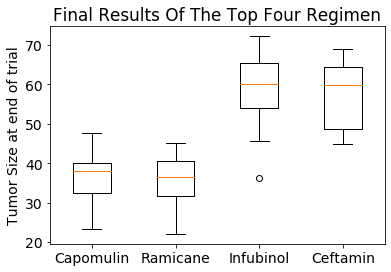

In [98]:
# Plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Results Of The Top Four Regimen')
ax1.set_ylabel('Tumor Size at end of trial')
plt.boxplot([capomulin_df,ramicane_df,Infubinol_df,ceftamin_df], labels =top_four_treatment)
plt.savefig("images/boxplot.PNG")
plt.show()

## Line and scatter plots

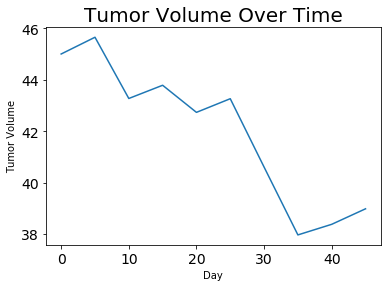

In [102]:
# Plot of time point versus tumor volume for a mouse treated with Capomulin.
mouse_ID = ["b128"]
mouse_trial = top_four_sorted[top_four_sorted["Mouse_ID"].isin(mouse_ID)]

plt.title("Tumor Volume Over Time", fontsize=20)
plt.xlabel("Day", fontsize=10)
plt.ylabel("Tumor Volume", fontsize=10)
plt.savefig("images/linechart.PNG")
plt.plot(mouse_trial["Timepoint"],mouse_trial["Tumor_Volume_(mm3)"])

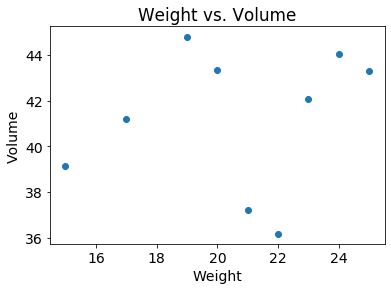

In [100]:
Weight_vs_volume = ["Capomulin"]
Weight_vs_volume_combined = combined_df[combined_df["Drug_Regimen"].isin(Weight_vs_volume)]
Weight_trial = combined_df.loc[combined_df["Drug_Regimen"] == "Capomulin"]["Weight_(g)"].unique()
the_mean = Weight_vs_volume_combined.groupby(Weight_Vol_Trial_Result["Weight_(g)"])["Tumor_Volume_(mm3)"].mean()

plt.title("Weight vs. Volume")
plt.xlabel("Weight")
plt.ylabel("Volume")
plt.scatter(Weight_trial,the_mean)
plt.savefig("images/scatter.PNG")
plt.show()

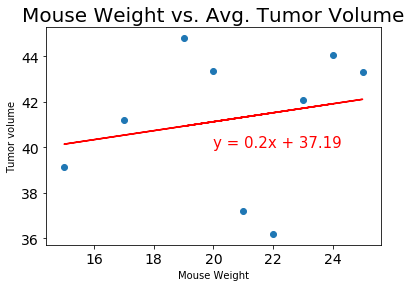

The correlation between the factors is 0.21


In [101]:
# Correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment.
correlation = st.pearsonr(Weight_Trial,the_mean)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Weight_trial, the_mean)
regress_values = Weight_trial * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title("Mouse Weight vs. Avg. Tumor Volume", fontsize=20)
plt.xlabel("Mouse Weight", fontsize=10)
plt.ylabel("Tumor volume", fontsize=10)
plt.plot(Weight_trial,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.scatter(Weight_trial,the_mean)
plt.savefig("images/plot.PNG")
plt.show()
print(f"The correlation between the factors is {round(correlation[0],2)}")